# **Sentiment Analysis of Movie Reviews**

# **Objective**
Build a machine learning model to predict whether a movie review has a positive or negative sentiment.

# **Data Source**
We will use the IMDb movie reviews dataset for this project.

# Import **Library**:

In [7]:
# Libraries for data manipulation
import pandas as pd
import numpy as np

# Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for Natural Language Processing (NLP)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# Libraries for modeling
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Text processing
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# **Import Data**

In [8]:
# Load the dataset
df = pd.read_csv('/content/new1.csv')  # Assuming the dataset is in CSV format


# **Describe Data**

In [9]:
# First 5 rows of the dataset
print(df.head())

# Data summary
print(df.info())

# Checking for missing values
print(df.isnull().sum())


                                              Review Sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     299 non-null    object
 1   Sentiment  299 non-null    object
dtypes: object(2)
memory usage: 4.8+ KB
None
Review       0
Sentiment    0
dtype: int64


# **Data Visualization**

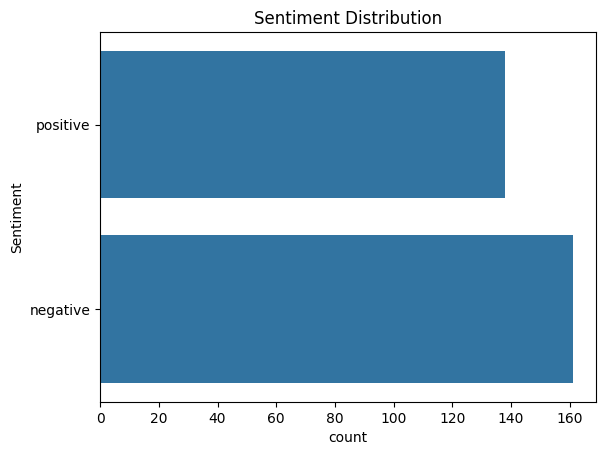

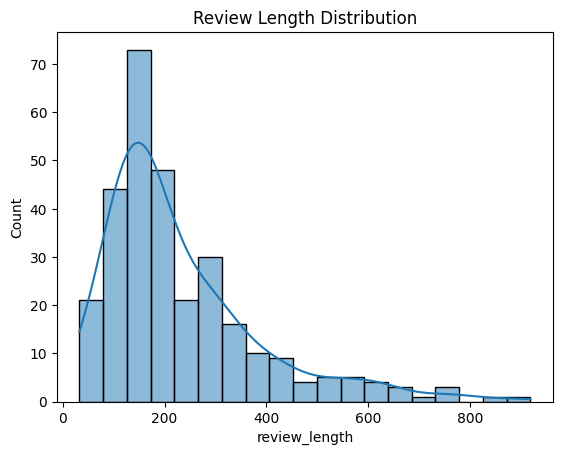

In [10]:
# Count of positive and negative reviews
sns.countplot(df['Sentiment'])
plt.title('Sentiment Distribution')
plt.show()

# Word count distribution in reviews
df['review_length'] = df['Review'].apply(lambda x: len(x.split()))
sns.histplot(df['review_length'], kde=True)
plt.title('Review Length Distribution')
plt.show()


# **Data Preprocessing**

In [11]:
# Cleaning and preprocessing text data
def clean_text(text):
    # Remove non-alphabet characters
    text = re.sub('[^a-zA-Z]', ' ', text)
    # Convert text to lowercase
    text = text.lower()
    # Tokenize and remove stopwords
    text = text.split()
    ps = PorterStemmer()
    text = [ps.stem(word) for word in text if not word in stopwords.words('english')]
    # Join words back to a single string
    return ' '.join(text)

# Apply cleaning function to reviews
df['cleaned_review'] = df['Review'].apply(clean_text)

# Visualizing cleaned data
print(df[['Review', 'cleaned_review']].head())


                                              Review  \
0  One of the other reviewers has mentioned that ...   
1  A wonderful little production. <br /><br />The...   
2  I thought this was a wonderful way to spend ti...   
3  Basically there's a family where a little boy ...   
4  Petter Mattei's "Love in the Time of Money" is...   

                                      cleaned_review  
0  one review mention watch oz episod hook right ...  
1  wonder littl product br br film techniqu unass...  
2  thought wonder way spend time hot summer weeke...  
3  basic famili littl boy jake think zombi closet...  
4  petter mattei love time money visual stun film...  


# **Define Target Variable (y) and Feature Variables (X)**

In [13]:
# Define feature (X) and target (y)
X = df['cleaned_review']  # Feature: Cleaned reviews
y = df['Sentiment'].map({'positive': 1, 'negative': 0})  # Convert sentiment labels to binary


# **Train Test Split**

In [14]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorizing text data (Converting text into numerical representation)
vectorizer = CountVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train).toarray()
X_test_vec = vectorizer.transform(X_test).toarray()


# **Modeling**

In [15]:
# Building a Naive Bayes model
model = MultinomialNB()
model.fit(X_train_vec, y_train)


MultinomialNB()

# **Model Evaluation**

In [16]:
# Predictions on test data
y_pred = model.predict(X_test_vec)

# Evaluation metrics
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}')
print(f'Classification Report:\n {classification_report(y_test, y_pred)}')


Accuracy: 0.7833333333333333
Confusion Matrix:
 [[28  2]
 [11 19]]
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.93      0.81        30
           1       0.90      0.63      0.75        30

    accuracy                           0.78        60
   macro avg       0.81      0.78      0.78        60
weighted avg       0.81      0.78      0.78        60



# **Prediction**

In [17]:
# Example of a new review
new_review = ["The movie was fantastic! I loved the plot and the acting."]
new_review_cleaned = vectorizer.transform([clean_text(new_review[0])]).toarray()

# Predict sentiment
predicted_sentiment = model.predict(new_review_cleaned)
print("Sentiment Prediction: ", 'Positive' if predicted_sentiment[0] == 1 else 'Negative')


Sentiment Prediction:  Positive


# **Explanation:**
**Data Preprocessing:** We cleaned the reviews by removing unwanted characters, tokenizing, stemming, and removing stopwords to prepare the text for modeling.

**Vectorization:** We transformed the cleaned reviews into numerical data using the Bag-of-Words model (CountVectorizer).

**Model**: We trained a Naive Bayes classifier on the vectorized text data. Naive Bayes is a common choice for text classification tasks due to its simplicity and effectiveness.

**Evaluation:** We evaluated the model’s performance using accuracy, confusion matrix, and classification report, which provided detailed insights into the precision and recall of the model.

**Prediction**: The model can now predict the sentiment of any new review text.
